# Inferential Statistics in Python

#### Author: Murali

1. Central Limit Theorem (CLT)
2. Confidence Intervals
3. Hypothesis Testing
  * Steps in Hypothesis Testing
  * Inference for Single Mean
  * Inference for Comparing Two Means (Categorical vs. Continuous variable relationship)
  * Inference for Comparing Multiple Means (ANOVA)
  * Inference for Single Proportion
  * Inference for Comparing Two Proportions (Categorical vs. Categorical variable relationship)
  * Inference for Comparing Two/Multiple Proportions

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## 1. Central Limit Theorem

### 1a. Population and Samples
The values/metrics that we report come from the sample data. But, we are often interested in the population parameters. Since, it is impossible to collect data for the entire population, we use sample statistics as point estimates for the unknown population paramters.

* Population - Parameter (unknown)
* Sample - Statistic, point estimate (known)

![def.PNG](img/def.PNG)



### 1b. Normal Distribution

![normal_dist.png](img/normal_dist.png)

### 1c. Sampling Variability
Sample statistics vary from sample to sample. Quantifying how the sample statistics vary will provide an idea about the margin of error in estimating population parameters.

[CLT - RShiny App](https://gallery.shinyapps.io/CLT_mean/)

Sampling Distribution - Distrbution of means of all samples

![sampling%20dist1.PNG](img/sampling_dist.PNG)

### 1d. CLT
What differences did you observe in the population distribution and the sampling distribution?

1. The sampling distribution is also normal (for higher sample sizes)
2. Mean ($\bar x$) of the sampling distribution is closer to the population mean
3. Std. Deviation (also called Std. Error, denoted by $s$) of the sampling distribution is less than the population std. deviation
![clt.PNG](img/clt.PNG)


### 1e. Exercise
I am about to take a trip to visit my parents and the drive is 6 hours. I make a random playlist of 100 songs. ($\mu$ = 3.45, $\sigma$ = 1.63). What is the probability that my playlist lasts the entire drive?

1. Plot the sampling distribution
2. Calculate z-score
3. Calculate probability associated with that z-score

**What is z-score? Measure of how many std. deviations the sample mean is away from the true mean**

z = ($\bar x$ - $\mu$) / $SE$

SE = $\sigma$/$\sqrt{n}$

In [63]:
# Scipy Stats provides variety of functionalities for various distributions. 
# Norm stands for Normal distribution, cdf - Cumulative distribution function

# To last 6 hours, we want the avg. length to be greater than (6*60)/100 = 3.6 mins.
stats.norm(loc=3.45, scale=0.163).cdf(3.6)

0.8212777324852482

In [64]:
# However, based on the question, we want to know the greater than probability
stats.norm(loc=3.45, scale=0.163).sf(3.6) # sf = 1 - cdf

0.17872226751475184

In [65]:
# Calculate the probability directly using the z_score
mu = 3.45
x = 3.6
sigma = 1.63
n = 100
z_score = (3.6 - 3.45)/(sigma/math.sqrt(100))
print(z_score)
print(1 - stats.norm.cdf(z_score)) # If you don't define loc, scale (mean, SE), it will asumme a normal dist with loc=0, scale=1

0.9202453987730057
0.17872226751475173


In [4]:
# Exercise
# Suppose heights of all men in India have a mean of 69.1 inches and a standard deviation of 2.9 inches. 
# What is the probability that a random sample of 100 men will yield a sample average less than 70 inches?
mu=69.1
x=70
sigma=2.9
n=100
z_score = (70 - 69.1)/(sigma/math.sqrt(100))
stats.norm.cdf(z_score)

0.9990436016629858

In [67]:
print(stats.norm.ppf(0.90))

1.2815515655446004


In [68]:
# Get the z-scores for some popular middle xx% probabilities

# 90% in the middle
print(stats.norm.ppf(0.95))

# 95% in the middle
print(stats.norm.ppf(0.975))

# 99% in the middle
print(stats.norm.ppf(0.995))

1.6448536269514722
1.959963984540054
2.5758293035489004


In [69]:
# Exercise
# Confirm that z⋆ for a 98% confidence level is 2.33.
stats.norm.ppf(0.99)

2.3263478740408408

## 2. Confidence Intervals

### C.I = $\bar x$ $\pm$ z* SE

where 

SE = $\sigma$/$\sqrt{n}$, 

z* = critical value corresponding to the middle xx% of the normal distribution

* For 90% C.I, z = 1.64
* For 95% C.I, z = 1.96
* For 99% C.I, z = 2.58

In [70]:
# Exercise - Create a CI function 
# Input: sample mean, std.dev, sample size, CI %
# Output: CI as a tuple
def conf_int(n, mean, std_dev, ci):
    z_score = stats.norm.ppf(ci + ((1-ci)/2))
    me = z_score * (std_dev/math.sqrt(n)) #right side term

    lower_bound = mean - me
    upper_bound = mean + me
    # write your code here
    return (lower_bound, upper_bound)

In [71]:
# Exercise
# 1. Calculate a 95% confidence interval for the average weekly grocery spend using a random sample of 100 people 
# where the sample mean is 180 rupees and the sample standard deviation is 21 rupees
# Interpret this interval in context of the data.
# 2. Calculate the 99% CI for the above problem
# 3. What are your observations from Q2 and Q3

# Ans: (160, 200) We are 95% confident that the true pop mean (single value - mu) lies in this range

In [ ]:
# xbar = 5'7'', (5'4'', 5'10'')

### Accuracy vs. Precision
* What if I want to be more sure about my interval?
* What happens if I increase confidence %?
* How to be more precise for the same confidence %?


In [72]:
# Exercise - What is the required sample size for a desired ME (Margin of Error)


## 3. Hypothesis Testing

Hypothesis testing is a critical tool in inferential statistics, for determing what the value of a population parameter could be or whether our claim on the population can be proven with the sample data at hand.

[Introduction to Hypothesis Testing](https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Resources/Introduction%20to%20Hypothesis%20Testing.pdf)

Steps in Hypothesis Testing -

1. Define the Null and Alternate hypothesis
   * Null Hypothesis: $H_0$
   * Alternative Hypothesis: $H_a$


2. Calculate test-statistic
   * The equation is:
$$\frac{Point\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$


3. Calculate p-value
    * **p-value = probability of observed or more extreme observations given the null hypothesis is true**


4. Interpret the p-value and validate the claim

### 3a. Inference for Single Mean

**Question:** We have conducted a Stats exam for a sample batch to test the effectiveness of new training program. Leadership has a question whether the test is effective or not? (Effectiveness is defined when the avg. marks more than 70)

**Population:** All trainees (present/future) that will join the organization <br>
**Parameter of interest:** Avg. marks of population 

**Null Hypothesis:** $\mu$ = 70 <br>
**Alternative Hypthosis:** $\mu$ > 70

**Experiment Data:** 45 trainees, avg and std. dev of their marks



In [ ]:
#Z-test or t-test (less sample sizes, <30)
#one sample or two sample
#one sided (one tailed) or two sided (two tailed)
# if two sided - independent or dependent

In [73]:
marks = np.array([67, 43, 87, 56, 34, 89, 92, 78, 21, 98, 76, 59, 93, 84, 88, 45, 49, 71, 84, 87, 94, 97, 40, 65,
                  56, 43, 78, 72, 80, 63, 60, 85, 82, 95, 96, 79, 65, 76, 85, 72])

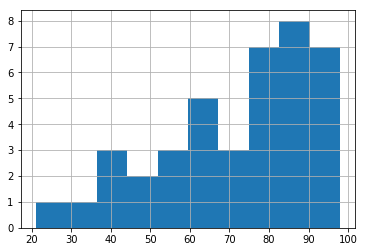

In [74]:
pd.Series(marks).hist()

In [75]:
(len(marks), marks.mean(), marks.std())

(40, 72.1, 19.175244457372635)

In [76]:
# Statsmodels provides numerous statistical tests - https://www.statsmodels.org/stable/stats.html
# Perform single sample, one-tailed z-test
sm.stats.ztest(marks, value = 70, alternative = "larger")
# Outputs - test statistic (z_score), p-value

(0.6839284800666124, 0.2470101644686558)

**Conclusion of the Hypothesis Test:** p-value is 0.247 <br>
Since the p-value is much higher than the usual cut-off (0.05), we fail to reject null hypothesis. The data doesn't provide strong evidence for the alternate hypothesis that the mean stats marks is higher than 70. We cannot say that this programme is effective.

In [77]:
# Exercise
# Let's say we directly have mean and std.dev without the actual data. How do we use the above function?


In [2]:
marks_dummy = np.random.normal(loc=72.1, scale=19.18, size=45)

In [3]:
marks_dummy

array([ 82.55298028,  95.2133432 ,  96.09708431,  48.63780479,
        79.21936158,  57.98535489,  89.19982972,  76.34735361,
        74.94479181,  80.28937501,  95.61220832,  46.09300668,
        53.57939096,  68.40893933,  77.39510338,  42.97999373,
        75.62707837,  58.13329192,  60.37191311,  35.14313418,
        92.88742464,  73.86584563,  90.03892978,  57.81240551,
        69.011431  ,  75.66915069, 110.38427043,  61.5095468 ,
        88.71323323,  55.8652277 ,  25.32342958,  67.28179806,
        68.79929388, 104.49199773, 113.16720836, 115.45559804,
        57.98118231,  43.16755128,  74.28902626,  91.9759031 ,
        98.16177786,  88.6422559 ,  51.50369493,  76.75339997,
        76.06082515])

### 3b. Inference for Comparing Two Means (Categorical vs. Continuous Relationship)

**Question:** Given the Employee Attrition dataset, does attrition depends on daily rate of employees? In other words, do attrition employees have significantly different salary (DailyRate) compared to non-attrition employees?

**Population:** Employees
**Parameter of interest:** $\mu_1 - \mu_2$, Diff in avg. daily rate of employees

**Null Hypothesis:** $\mu_1 = \mu_2$ <br>
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

**Experiment Data:** Employee Attrition Dataset

In [78]:
df = pd.read_csv('employee_attrition.csv')
df.head()
#df.isna().sum(axis=0)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [79]:
att_emp = df[df['Attrition']=='Yes']
non_att_emp = df[df['Attrition']=='No']

In [80]:
n1 = len(att_emp)
x1 = att_emp["DailyRate"].mean()
s1 = att_emp["DailyRate"].std()

(n1, x1, s1)

(237, 750.3628691983122, 401.89951940778354)

In [81]:
n2 = len(non_att_emp)
x2 = non_att_emp["DailyRate"].mean()
s2 = non_att_emp["DailyRate"].std()

(n2, x2, s2)

(1233, 812.5044606650446, 403.2083790501569)

In [82]:
# Please closely investigate the function here 
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html
sm.stats.ztest(att_emp["DailyRate"], non_att_emp["DailyRate"],alternative='two-sided')

(-2.1740836777017747, 0.029698851543253354)

**Conclusion of the Hypothesis Test:** p-value is 0.0296 <br>
Since the p-value is lower than the usual cut-off (0.05), we reject the null hypothesis. The data provides sufficient evidence that the DailyRate is significantly different for different attrited employees

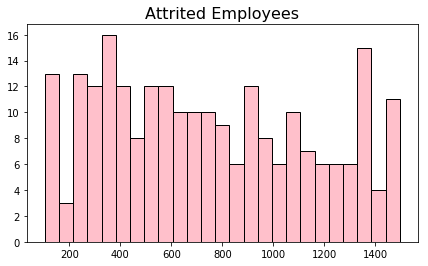

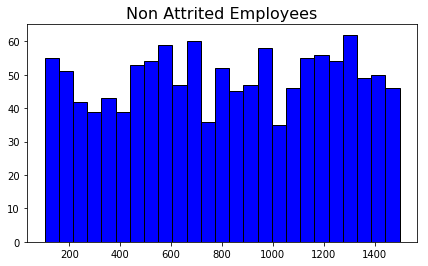

In [83]:
# Let's look at plots
plt.figure(figsize=(7,4))
plt.title("Attrited Employees",fontsize=16)
plt.hist(att_emp["DailyRate"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Non Attrited Employees",fontsize=16)
plt.hist(non_att_emp["DailyRate"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()

In [84]:
# Exercise - In the IMDB dataset, does the ratings of USA movies significantly higher than Non-USA movies?
# One-sample or two-sample? One-sided or two-sided?


### T-tests

**When are t-tests used?** <br>
T-tests are introduced to take care of uncertainity during low sample sizes (scientifically, sample sizes < 30)

**t-distribution vs z-distribution** <br>
T-distribution is slightly wider than normal distribution. Unlike normal distribution, it is not fixed, but varies by sample size (called degrees of freedom). As the sample size increases, the degrees of freedom increases and t-dist approximates to z-dist

**Industrial use** <br>
Usage widely varied by industry. In analytics, t-test are often used for comparing difference in two means

**Types of t-tests** <br>
* One-sided vs. two-sided (similar to above)
* Independent samples vs dependent samples (also called paired vs non paired t-test)

### T-test (Independent or Non-paired)

In [91]:
# Using t-test for the above problem
# Independent t-test, two-sided, pooled variance
sm.stats.ttest_ind(att_emp["DailyRate"], non_att_emp["DailyRate"], alternative='two-sided')

(-2.1740836777017747, 0.02985816066026497, 1468.0)

**Conclusion of the Hypothesis Test:** p-value is 0.02985 <br>
The t-stat and p-value are almost equal to z-test above since the sample size is high for both the samples

### T-test (Dependent or Paired)

Example of dependent samples (paired t-test) - Any 'before-after' scenario experiments, or if the samples from both the groups have 1-1 paired relationships.

**Question:** To test the effectiveness of a drug, sample readings were collected before and after the drug dosage. Based on the readings, identify whether the drug is positively effective or not?

**Population:** People who will receive the drug <br>
**Parameter of interest:** $\mu_1 - \mu_2$, Diff in avg. readings

**Null Hypothesis:** $\mu_1 - \mu_2$ = 0<br>
**Alternative Hypthosis:** $\mu_1 - \mu_2$ $\neq$ 0

**Experiment Data:** Drug experiment data


In [86]:
# This is just a one sample t-test on the differences, where the null hypothesis value is zero
import random
before_exp = random.sample(range(60, 100), 30)
after_exp = random.sample(range(80, 110), 30)
diff_in_readings = [after - before for (after,before) in zip(after_exp, before_exp)]
diff_in_readings

[10,
 14,
 22,
 45,
 20,
 12,
 17,
 10,
 11,
 14,
 24,
 -10,
 -4,
 21,
 21,
 6,
 25,
 12,
 20,
 14,
 3,
 12,
 25,
 11,
 27,
 14,
 8,
 15,
 9,
 31]

(array([1., 1., 2., 6., 9., 5., 4., 1., 0., 1.]),
 array([-10. ,  -4.5,   1. ,   6.5,  12. ,  17.5,  23. ,  28.5,  34. ,
         39.5,  45. ]),
 <a list of 10 Patch objects>)

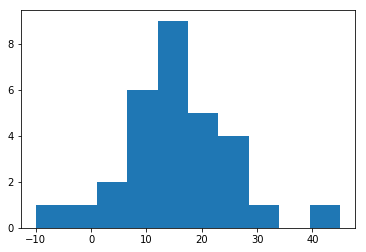

In [87]:
plt.hist(diff_in_readings)

In [88]:
# Single mean t-test is not present in statsmodels. So, we will use z-test even though the sample size is small
sm.stats.ztest(diff_in_readings, alternative='larger')

(8.0250828203694, 5.072873559835365e-16)

In [89]:
# Using the single mean t-test from scipy.stats
stats.ttest_1samp(diff_in_readings, popmean = 0) # Returns a two-sided p-value

Ttest_1sampResult(statistic=8.0250828203694, pvalue=7.520168508672497e-09)

**Conclusion of the Hypothesis Test:** p-value is 3.61e-07 (very very small) <br>
Since the p-value is much smaller, we can reject the null-hypothesis. The data provides sufficient evidence that the readings after the drug test are significantly higher compared to before the drug was administered.

### 3c. Inference for Comparing Multiple Means (Multi-Categorical vs. Continuous Relationship)

### ANOVA (F-test) - Used to compare means of more than 2 groups

**Types:** One-way (one factor) ANOVA, Two-way (two factor) ANOVA

**Hypothesis:**
*  NULL Hypothesis: All group means are equal (no difference in means across different groups)
*  Alternate Hypothesis: Atleast one group mean is different from other groups

**How ANOVA works:** [Visual Tutorial of ANOVA](https://www.youtube.com/watch?v=-yQb_ZJnFXw)

-------------------------

**Question:** We have a dataset where we have observations from 4 different groups. Let's assume that these are the customer engagement scores after exposing them to different 3 new experiences keeping one group as control. Using this sample data, provide an insight into whether the new experiences have different engagement scores?

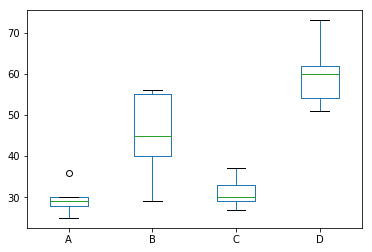

In [3]:
# Source: reneshbedre.github.io
data = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
data.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [4]:
data

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [5]:
# Scipy stats f_oneway function takes the groups as input and returns F and P-value
stats.f_oneway(data['A'], data['B'], data['C'], data['D'])

F_onewayResult(statistic=17.492810457516338, pvalue=2.639241146210922e-05)

**Conclusion:** As the p-value is much lower than 0.05, we reject he NULL hypothesis and conclude that there are significant differences between the groups. However, we cannot say which particular groups are different from others

### Post-hoc Comparison (Tukey HSD Test) (Optional)
Used to compare the pair-wise group means

In [10]:
#!pip install pingouin
#from pingouin import pairwise_tukey

In [ ]:
# reshape the dataframe suitable for pingouin package 
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
data_melt.columns = ['index', 'treatments', 'value']
data_melt.head()

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
# for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
pairwise_comp = pairwise_tukey(data=data_melt, dv='value', between='treatments')
print(pairwise_comp)

### Two-way ANOVA - MANOVA
Used to compare two different factors (two independent variables) against a continuous outcome
    
**Example:** [Effect of genotype (first factor) and year (second factor) on yield of plants](https://reneshbedre.github.io/blog/anova.html)

### 3d. Inference for Single Categorical Variable (>=2 levels)

Chi-Square Goodness-Of-Fit test

**Question:** We want to understand whether India produces similar genre movies compared to rest of the world. in other words, does the Indian movie genre distribution differ to an expected population distribution

In [11]:
# Data - Assume there are 5 genres - Romance, Drama, Action, Thriller, Horror
indian_genre = [34, 45, 60, 12, 8]

In [19]:
stats.chisquare(f_obs = indian_genre) # f_exp is assumed to have equal distribution

Power_divergenceResult(statistic=60.77987421383648, pvalue=1.9888794232903695e-12)

**Conclusion:** Based on the chisq-stat and p-value, Indian genre movies differ significantly to the world's genre. But, here we assumed that the world's genre is equally distributed.

In [20]:
world_avg_genre =  [38, 42, 58, 10, 12]
stats.chisquare(f_obs = indian_genre, f_exp = world_avg_genre) #f_exp is assumed to have equal distribution

Power_divergenceResult(statistic=2.4376371964393746, pvalue=0.65583653407678)

**Conclusion:** Based on the chisq-stat and p-value, Indian genre movies doesn't differ significantly to the world's genre.

### 3e. Inference for Two Categorical Variables (Cat vs. Cat variable Relationship)

Chi-Square Test of Indepdence

**Question:** Based on the Employee Attrition dataset, does business travel frequency has an impact on attrition?

In [22]:
# The two variables of interest: BusinessTravel, Attrition
df = pd.read_csv('employee_attrition.csv')
contingency_table = pd.crosstab(df['BusinessTravel'], df['Attrition'])
contingency_table

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [24]:
# Returns stat, p-value, dof, expected values
stats.chi2_contingency(contingency_table)

(24.182413685655174,
 5.608614476449931e-06,
 2,
 array([[125.81632653,  24.18367347],
        [232.34081633,  44.65918367],
        [874.84285714, 168.15714286]]))

**Conclusion:** Based on the chisq-stat and p-value, we can reject the Null Hypothesis (no dependence between business travel and Attrition) and conclude that the data provides strong evidence that Attrition is dependent on Business travel.

---------------------------

### What you should do next?
* Complete the assignment - Covers all the learnings from Descriptive and Inferential Stats on a single real-world dataset
* Take a dataset that you use in your day-to-day work and apply at-least two new things that you have learnt in this module

### What you can do next?
* [Inferential Statistics Revised](https://www.coursera.org/learn/inferential-statistics-intro)
* [Fitting Statistical Models in Python](https://www.coursera.org/learn/fitting-statistical-models-data-python)
* [Machine Learning](https://www.coursera.org/learn/machine-learning?)